# CAMS
https://ads.atmosphere.copernicus.eu/datasets/cams-europe-air-quality-forecasts?tab=overview

In [1]:
import os
import requests
import bz2
import gzip
import pygrib
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geopy.distance import geodesic

In [4]:
# params 
downloads_dir = 'data'

In [5]:
files = os.listdir(downloads_dir)
files

['CAMS_2023-07-24_23-12-31.grib']

In [10]:
file = files[0]

grb = pygrib.open(os.path.join(downloads_dir, file))

for g in grb:
    print(g)

1:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300000
2:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300000
3:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300100
4:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300100
5:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300200
6:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300200
7:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300300
8:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300300
9:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300400
10:Mass density:kg m**-3 (instant):regular_ll:surface:level 0 -:fcst time 0 hrs:from 202310300400
11:Mass density:kg m**-3 (ins

In [11]:
data = []
g = grb[2]

latitudes, longitudes = g.latlons()
values = g.values
parameter_name = g.name
parameter_units = g.units
date_time = g.analDate
forecast_time = g.stepRange
#forecast_time = g.forecastTime

In [12]:
dir(g)

['GRIBEditionNumber',
 'NV',
 'Ni',
 'Nj',
 'PLPresent',
 'PVPresent',
 '__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_all_keys',
 '_get_key',
 '_read_only_keys',
 '_reshape_mask',
 '_ro_keys',
 '_set_projparams',
 '_unshape_mask',
 'alternativeRowScanning',
 'analDate',
 'analDate',
 'angleDivisor',
 'angleMultiplier',
 'angleSubdivisions',
 'average',
 'backgroundProcess',
 'basicAngleOfTheInitialProductionDomain',
 'binaryScaleFactor',
 'bitMapIndicator',
 'bitmapPresent',
 'bitsPerValue',
 'bottomLevel',
 'centre',
 'centreDescription',
 'cfName',
 'cfNameECMF',
 'cfVarName',
 'cfVarNameECMF',
 'changeDecimalPrecision',
 'code

In [13]:
print(parameter_name)
print(parameter_units)
print(date_time)
print(forecast_time, 'Hours')
print('Top level:', g.topLevel)
print('Bottom level:', g.bottomLevel)

Mass density
kg m**-3
2023-10-30 00:00:00
0 Hours
Top level: 0
Bottom level: 0


In [14]:
values.data.shape

(78, 92)

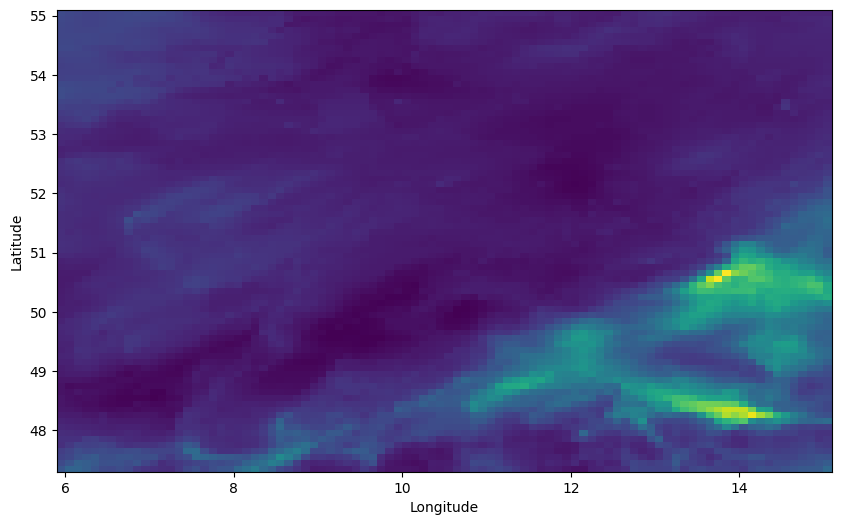

In [15]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(longitudes, latitudes, values,)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [16]:
point1 = (latitudes[0, 0], longitudes[0, 0])
point2 = (latitudes[0, 1], longitudes[0, 1])
point3 = (latitudes[1, 0], longitudes[1, 0])

# Berechne den Abstand in Kilometern zwischen benachbarten Punkten
resolution_lat = geodesic(point1, point3).kilometers  # Abstand in der Breitengradrichtung
resolution_lon = geodesic(point1, point2).kilometers

print(f"Räumliche Auflösung: {resolution_lat:.2f} Kilometer (Nord-Süd), {resolution_lon:.2f} Kilometer (Ost-West)")

Räumliche Auflösung: 11.13 Kilometer (Nord-Süd), 6.39 Kilometer (Ost-West)
